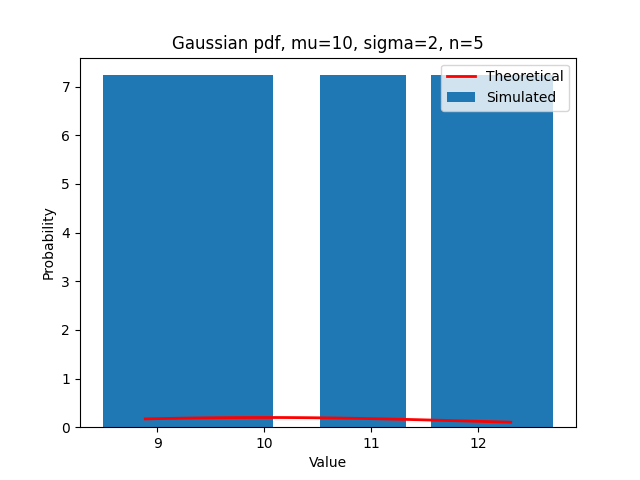

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=5 is between 9.46 and 12.05.


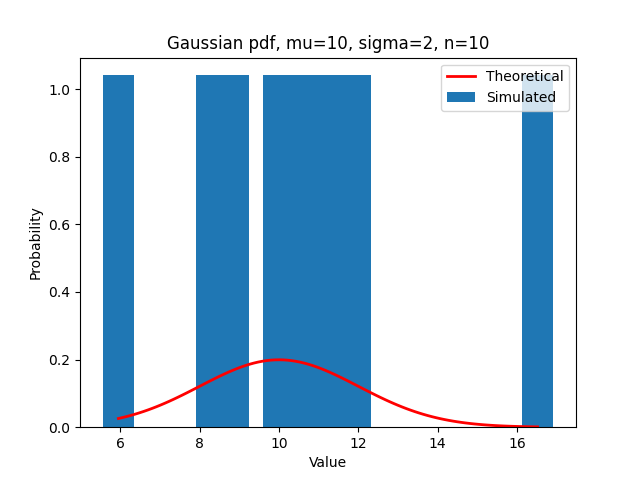

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=10 is between 8.80 and 12.24.


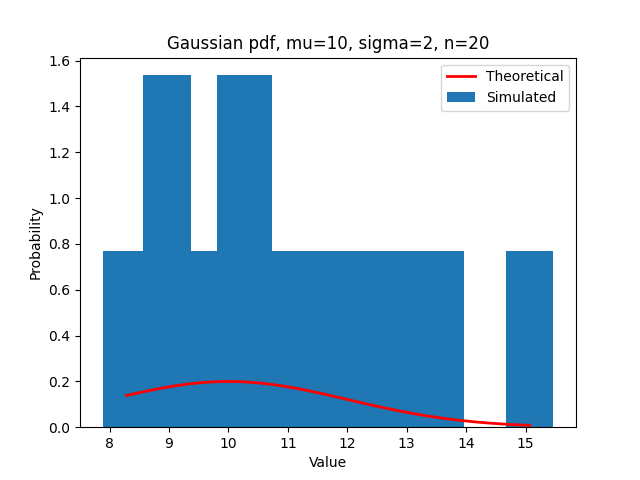

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=20 is between 10.10 and 11.65.


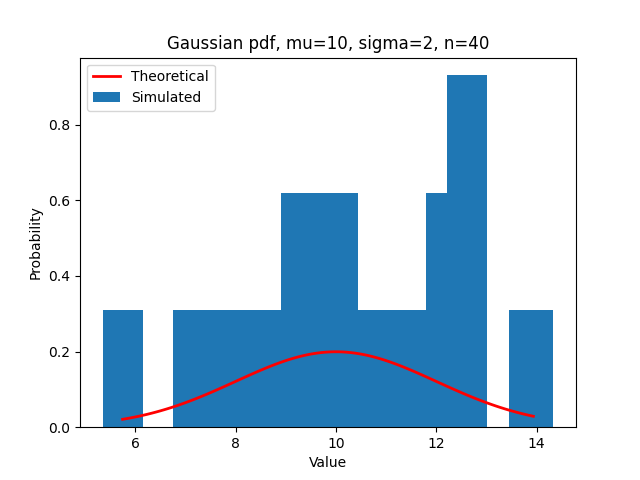

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=40 is between 9.70 and 10.84.


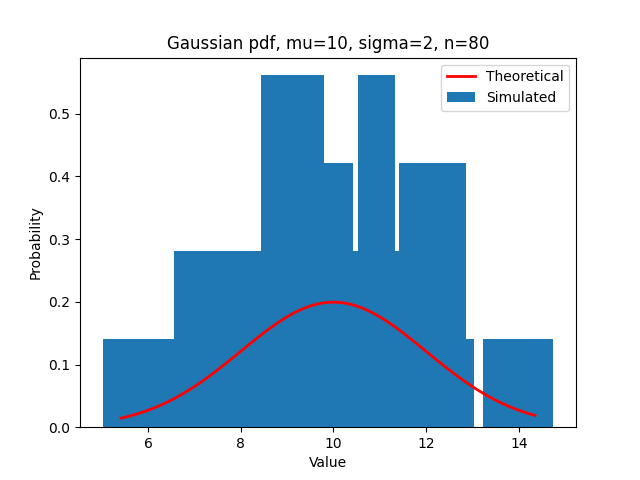

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=80 is between 9.50 and 10.35.


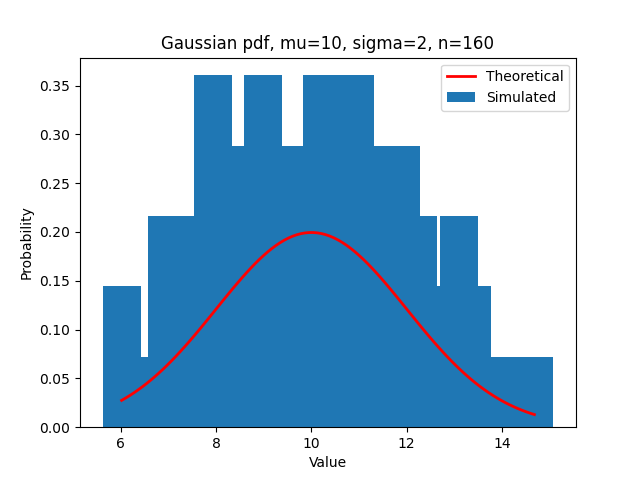

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=160 is between 9.85 and 10.44.


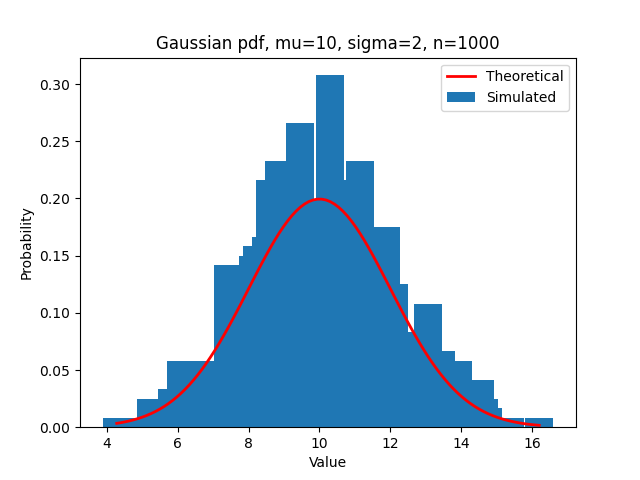

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=1000 is between 9.88 and 10.13.


In [37]:
#Compute confidence/credible intervals based on the four methods above 
#for simulated data sampled from a population that is Gaussian distributed with mean =10 and SD =2
#for n=5, 10, 20, 40, 80, 160, 1000 at a 95% confidence level.

#Method 1
import numpy as np
import scipy.stats as st
from scipy.stats import norm
from scipy.stats import sem
import matplotlib.pyplot as plt

#Define parameters and sample sizes
mu = 10
sigma = 2
n_list = [5, 10, 20, 40, 80, 160, 1000]

for step in np.arange(0, len(n_list), 1):
    #Get samples
    samples = np.random.normal(mu, sigma, n_list[step])
    
    # Show the distribution
    nbins = 100
    counts, edges = np.histogram(samples, bins=nbins)
    xaxis = (edges[1:] + edges[:-1])/2
    n_pdf = np.divide(counts, np.trapz(counts, xaxis))
    plt.bar(xaxis, n_pdf)
    
    # Show theoretical "standard normal" pdf in red
    plt.plot(xaxis, st.norm.pdf(xaxis, mu, sigma), 'r-', linewidth=2)

    # labels, ets
    plt.title(f'Gaussian pdf, mu={mu}, sigma={sigma}, n={n_list[step]}')
    plt.xlabel('Value')
    plt.ylabel('Probability')
    plt.legend(['Theoretical','Simulated'])
    plt.show()
    
    #Calculate mean and SEM of samples
    mean = np.mean(samples)
    SEM = sem(samples)
    
    #Calculate CI based on distribution mean, SEM, and z-score area
    CI_one = mean + (SEM * norm.ppf(0.025))
    CI_two = mean + (SEM * norm.ppf(0.975))
    print(f'The 95% confidence interval for this Gaussian distribution with mean={mu} and SD={sigma} with an N={n_list[step]} is between {CI_one:.2f} and {CI_two:.2f}.') 


In [31]:
#Method 2
import math
import statistics

#Go through different sample sizes
for step in np.arange(0, len(n_list), 1):
    #Define n for this sample
    n = n_list[step]
    
    #Get samples
    samples = np.random.normal(mu, sigma, n)
    
    #Calculate mean and SD of samples
    mean = np.mean(samples)
    SD = statistics.stdev(samples)

    #Calculat CI
    CI_one = mean + (st.t.ppf(0.025, n-1) * SD/np.sqrt(n))
    CI_two = mean + (st.t.ppf(0.975, n-1) *SD/np.sqrt(n))
    
    CI_one = np.mean(samples) + (sem(samples) * norm.ppf(0.025))
    CI_two = np.mean(samples) + (sem(samples) * norm.ppf(0.975))
    print(f'The 95% confidence interval for this Gaussian distribution with mean={mu} and SD={sigma} with an N={n_list[step]} is between {CI_one:.2f} and {CI_two:.2f}.\n') 

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=5 is between 7.86 and 10.69.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=10 is between 9.94 and 11.09.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=20 is between 8.62 and 10.69.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=40 is between 8.92 and 10.32.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=80 is between 9.46 and 10.20.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=160 is between 9.95 and 10.58.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=1000 is between 9.93 and 10.18.



In [33]:
#Method 3

numBoots  = 1000
bootmeans = np.zeros(numBoots)

#Go through different sample sizes
for step in np.arange(0, len(n_list), 1):
    #Define n for this sample
    n = n_list[step]
    
    #Get samples
    samples = np.random.normal(mu, sigma, n)

    #Calculate mean and SD of samples
    mean = np.mean(samples)
    SD = statistics.stdev(samples)

    #Resample with replacement 1000 times
    for booti in range(numBoots):
        #Assign mean to bootmeans array at place booti
        bootmeans[booti] = np.mean( np.random.choice(samples,n) )
    
    #Calculate mean and SD of bootmeans
    boot_mean = np.mean(bootmeans)
    boot_std = statistics.stdev(bootmeans)

    #Find CI based on bootmeans distribution
    CI_one = np.percentile(bootmeans,0.25)
    CI_two = np.percentile(bootmeans,97.75)

    print(f'The 95% confidence interval for this Gaussian distribution with mean={mu} and SD={sigma} with an N={n_list[step]} is between {CI_one:.2f} and {CI_two:.2f}.\n')

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=5 is between 7.68 and 12.41.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=10 is between 8.71 and 10.51.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=20 is between 9.03 and 11.02.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=40 is between 9.89 and 11.10.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=80 is between 9.02 and 10.03.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=160 is between 9.56 and 10.35.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=1000 is between 9.84 and 10.16.



In [36]:
#Method 4

for step in np.arange(0, len(n_list), 1):
    #Get samples
    samples = np.random.normal(mu, sigma, n_list[step])
    
    #Calculate mean and SEM of samples
    mean = np.mean(samples)
    SEM = sem(samples)
    
    #Calculate CI based on distribution mean, SEM, and z-score area
    CI_one = mean + (SEM * norm.ppf(0.025))
    CI_two = mean + (SEM * norm.ppf(0.975))
    print(f'The 95% confidence interval for this Gaussian distribution with mean={mu} and SD={sigma} with an N={n_list[step]} is between {CI_one:.2f} and {CI_two:.2f}.\n') 


The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=5 is between 9.72 and 12.36.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=10 is between 8.99 and 10.53.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=20 is between 8.35 and 10.00.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=40 is between 9.65 and 10.59.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=80 is between 9.73 and 10.57.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=160 is between 9.46 and 10.05.

The 95% confidence interval for this Gaussian distribution with mean=10 and SD=2 with an N=1000 is between 9.90 and 10.15.

